In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import sys  
sys.path.insert(0, '../')
import ERA5_functions as era_fncts

%load_ext autoreload
%autoreload 2

In [2]:
lats = np.linspace(90, -90, 361)
lons = np.linspace(0, 359.5, 720)
levels = [1, 2, 3, 5, 7, 10, 20, 30, 50, 70, 100, 125, 150, 175, 200, 225, 250, 300, 350,
            400, 450, 500, 550, 600, 650, 700, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]

In [3]:
g=9.81 #Gravitational acceleration
radius=6.376e6 #Earth radius in m
rot_rate=7.292e-5 #Earth rotation rate
Rd=287 #Dry air constant

In [194]:
#data = xr.open_dataset('../era5_raw_data/monthly_data/monthly_ave_data1980.nc')

data_files = sorted(glob('../era5_raw_data/monthly_data/*1988.nc'))
data = xr.open_mfdataset(data_files)

In [13]:
zon_norms = np.load('../Calculate_AHT/zonal_norms.npy')
weights = np.load('../Calculate_AHT/aht_weights.npy')
weights[np.isnan(weights)] = 0
    
weighting_ds = xr.Dataset(
                        data_vars = dict(
                            zon_norms=(['level', 'latitude', 'longitude'], zon_norms),
                            weights=(['level', 'latitude', 'longitude'], weights),
                        ),
                        coords=dict(
                            latitude=lats,
                            longitude=lons,
                            level=levels)
    )
    
vcomp = data.v
vcomp_zon_mean = (vcomp * weighting_ds.zon_norms).sum('longitude', skipna=True)

In [200]:
print(np.mean(zon_norms, axis=2)[:,-1])
print(vcomp.isel(time=0, latitude=-1).mean(['longitude']).level)

[0.00138889 0.00138889 0.00138889 0.00138889 0.00138889 0.00138889
 0.00138889 0.00138889 0.00138889 0.00138889 0.00138889 0.00138889
 0.00138889 0.00138889 0.00138889 0.00138889 0.00138889 0.00138889
 0.00138889 0.00138889 0.00138889 0.00138889 0.00138889 0.00138889
 0.00138889 0.00138889 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
<xarray.DataArray 'level' (level: 37)>
array([   1,    2,    3,    5,    7,   10,   20,   30,   50,   70,  100,  125,
        150,  175,  200,  225,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000], dtype=int32)
Coordinates:
    latitude  float32 -90.0
  * level     (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    time      datetime64[ns] 1988-01-01
Attributes:
    units:      millibars
    long_name:  pressure_level


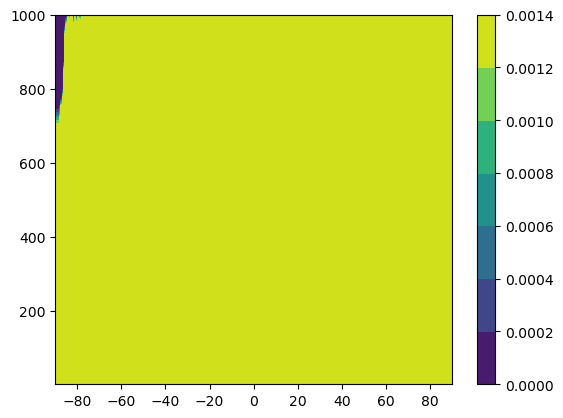

In [112]:
np.shape(zon_norms)

plt.contourf(lats, levels, np.nanmean(zon_norms, axis=2))

plt.colorbar()
plt.show()

In [156]:
data.v
                                       
#mass_flux[t,:,i]=weight[:,i]*v_zonal[t,:,i]*2*np.pi*radius*np.cos(lat[i]*np.pi/180)
#v_baro[t,i]=np.sum(mass_flux[t,:,i])/(2*np.pi*radius*np.cos(lat[i]*np.pi/180)*np.sum(weight[:,i]))
#v_corrected[t,:,i]=v_zonal[t,:,i]-v_baro[t,i]

#mass_flux_corrected=weight*v_corrected*2*np.pi*radius*np.cos(lat.values*np.pi/180)

    #for t in range(0, 12, 1):
        #for i in range(0, len(lat),1):
            #strm[t,:,i]=np.nancumsum(mass_flux_corrected[t,::-1,i])
            #strm[t,:,i]=strm[t,::-1,i]

<xarray.DataArray 'v' (time: 12, level: 37, latitude: 361, longitude: 720)>
[115404480 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 1980-12-01
Attributes:
    units:          m s**-1
    long_name:      V component of wind
    standard_name:  northward_wind

In [ ]:
np.shape(mass_flux_corrected.values)

In [ ]:
#which_levels = [-2.5, -2, -1.5, -1, -0.6, -0.3, -0.1, 0.1, 0.3, 0.6, 1, 1.5, 2, 2.5]
which_levels = range(-15, 16)

final_strm_fnct_season = final_strm_fnct.groupby('time.season').mean(['time'])

#cont=plt.contour(lats, levels, final_strm_fnct_season.sel(season='JJA')/1e11, levels=which_levels, colors='k')
cont=plt.contour(lats, levels, final_strm_fnct_season.mean(['season'])/1e11, levels=which_levels, colors='k')
#cont=plt.contour(lats, levels, (final_strm_fnct.isel(time=0) - new_strm[0,:,:])/1e11, levels=25, colors='k')
plt.gca().invert_yaxis()

def fmt(x):
    #rounded = f"{x:-2f}"
    rounded = f"{x:1f}"
    return rounded

plt.clabel(cont, cont.levels, inline=True, fmt='%2.f', fontsize=10)

#plt.xlim([-50, 50])
plt.show()

In [204]:
np.shape(vcomp.values)

(12, 37, 361, 720)

In [8]:
def calc_strm_funct(datas):
    '''Calculates the meridional overturning streamfunction from AM2 data in pressure coordinates by month
    
    Args:
        datas(Xarray dataset)- An Xarray dataset from AM2 output
        rot_rate_multiplier(int)- The rotation rate as a ratio of normal
        
    Output:
        strm- Meridional streamfunction
        lat- Latitude dimension
        pres- Pressure coordinate
        pres_level- Half level of the pressure coordinate
        lat_max- Latitude of maximum streamfunction
    '''
    
    time=datas.time
    lats=datas.latitude
    lons=datas.longitude
    levels=datas.level
    
    #Constants
    g=9.81 #Gravitational acceleration
    radius=6.376e6 #Earth radius in m
    
    zon_norms = np.load('../Calculate_AHT/zonal_norms.npy') #Dims (level, lat, lon)
    
    weights = np.load('../Calculate_AHT/aht_weights.npy') / g #Dims (level, lat, lon)
    weights[np.isnan(weights)] = 0
    weights_zon_mean = np.nanmean(weights, axis=2) #Dims (level, lat)
    
    geom_multiplier = 2 * np.pi * radius * np.cos(lats.values*np.pi/180) #Dims (lat)
    
    vcomp = datas.v #Dims (time, level, lat, lon)
    vcomp_zon_mean = np.nansum(vcomp * zon_norms[None,:,:,:], axis=3) #Dims (time, level, lat)

    mass_flux = vcomp_zon_mean * weights_zon_mean[None,:,:] * geom_multiplier[None,None,:] #Dims (time, level, lat)

    vcomp_baro = np.nansum(mass_flux, axis=1) / ((geom_multiplier)*np.nansum(weights_zon_mean, axis=0))[None,:] #Dims (time, lat)

    vcomp_corrected = vcomp_zon_mean - vcomp_baro[:, None,:] #Dims (time, level, lat)

    mass_flux_corrected = vcomp_corrected * weights_zon_mean[None,:,:] * geom_multiplier[None,None,:] #Dims (time, level, lat)
    mass_flux_corrected_reverse = mass_flux_corrected[:,::-1,:]
    
    strm_fnct = np.nancumsum(mass_flux_corrected, axis=1)

    strm_fnct_da = xr.DataArray(data=strm_fnct,
                                dims=['time', 'level', 'latitude'],
                            coords=dict(
                                time=time,
                                latitude=lats,
                                level=levels)
        )
        
    return(strm_fnct_da)

In [153]:
def calc_strm_funct_old(datas):
    '''Calculates the meridional overturning streamfunction from AM2 data in pressure coordinates by month
    
    Args:
        datas(Xarray dataset)- An Xarray dataset from AM2 output
        rot_rate_multiplier(int)- The rotation rate as a ratio of normal
        
    Output:
        strm- Meridional streamfunction
        lat- Latitude dimension
        pres- Pressure coordinate
        pres_level- Half level of the pressure coordinate
        lat_max- Latitude of maximum streamfunction
    '''
    
    time=datas.time
    lat=datas.latitude
    lon=datas.longitude
    pres=datas.level
    
    #Constants
    g=9.81 #Gravitational acceleration
    radius=6.376e6 #Earth radius in m
    rot_rate=7.292e-5 #Earth rotation rate
    Rd=287 #Dry air constant
    
    zon_norms = np.load('../Calculate_AHT/zonal_norms.npy')
    weights = np.load('../Calculate_AHT/aht_weights.npy')
    weights[np.isnan(weights)] = 0

    weighting_ds = xr.Dataset(
                            data_vars = dict(
                                zon_norms=(['level', 'latitude', 'longitude'], zon_norms),
                                weights=(['level', 'latitude', 'longitude'], weights),
                            ),
                            coords=dict(
                                latitude=lats,
                                longitude=lons,
                                level=levels)
        )

    vcomp = data.v
    vcomp_zon_mean = (vcomp * weighting_ds.zon_norms).sum('longitude', skipna=True)

    weights_zon_mean = weighting_ds.weights.mean(['longitude'], skipna=True)
    geom_multiplier = 2 * np.pi * radius * np.cos(lats*np.pi/180)

    mass_flux = vcomp_zon_mean * weights_zon_mean * geom_multiplier

    vcomp_baro = mass_flux.sum('level', skipna=True) / ((geom_multiplier)*weights_zon_mean.sum('level', skipna=True))

    vcomp_corrected = vcomp_zon_mean - vcomp_baro

    mass_flux_corrected = vcomp_corrected * weights_zon_mean * geom_multiplier
    mass_flux_corrected_reverse = mass_flux_corrected.reindex(level=mass_flux_corrected.level[::-1])
    
    #new_strm = np.nancumsum(mass_flux_corrected.values, axis=1)[:,::-1,:]
    #new_strm = np.nancumsum(mass_flux_corrected_reverse.values, axis=1)[:,::-1,:]
    #new_strm = np.zeros((12, 37, 361))
    #for t in range(0, 12, 1):
        #for i in range(0, len(lats),1):
            #new_strm[t,:,i] = np.nancumsum(mass_flux_corrected.values[t,::-1,i])
            #new_strm[t,:,i] = new_strm[t,::-1,i]
            
    #mass_flux_corrected_reverse = mass_flux_corrected.values[:,::-1,:]

    #strm_fnct = mass_flux_corrected_reverse.cumsum('level', skipna=True)
    #final_strm_fnct = strm_fnct.reindex(level=strm_fnct.level[::-1])
    
    #final_strm_fnct = mass_flux_corrected.isel(level=slice(None, None, -1)).cumsum('level', skipna=True).isel(level=slice(None, None, -1))
    
    final_strm_fnct_new = mass_flux_corrected.cumsum('level', skipna=True)

    return(final_strm_fnct_new)
    #return(new_strm)

In [87]:
test = calc_strm_funct(xr.open_dataset('../era5_raw_data/monthly_data/monthly_ave_data1980.nc'))

In [76]:
#test



In [13]:
#data = xr.open_dataset('../era5_raw_data/monthly_data/monthly_ave_data1980.nc')
data_files = sorted(glob('../era5_raw_data/monthly_data/*.nc'))

all_strms = np.zeros((len(data_files)*12, 37, 361))
for idx, file in enumerate(data_files):
    data = xr.open_dataset(file)
    all_strms[idx*12:(idx*12)+12,:,:] = era_fncts.calc_strm_funct(data)

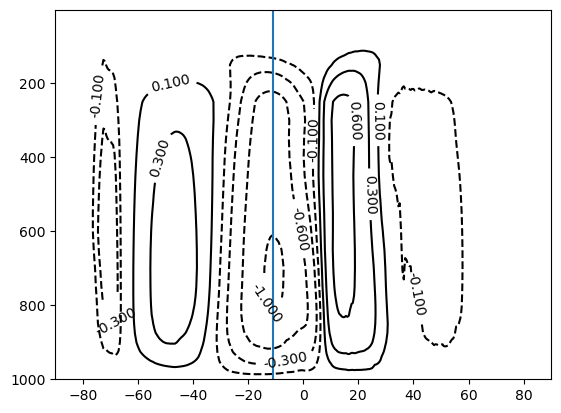

In [20]:
which_levels = [-2.5, -2.0, -1.5, -1.0, -.6, -.3, -.1, .1, .3, .6, 1.0, 1.5, 2.0, 2.5]
#which_levels = range(-15, 16)
#which_levels = [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1,
                #1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
#final_strm_fnct_season = final_strm_fnct.groupby('time.season').mean(['time'])

#cont=plt.contour(lats, levels, final_strm_fnct_season.sel(season='JJA')/1e11, levels=which_levels, colors='k')
cont=plt.contour(lats, levels, np.mean(all_strms, axis=(0))/1e11, levels=which_levels, colors='k')
#cont=plt.contour(lats, levels, np.mean(all_strms, axis=(0))[0,:,:]/1e11/g, levels=which_levels, colors='k')
#cont=plt.contour(lats, levels, np.mean(all_strms, axis=(0, 1))/1e11, levels=which_levels, colors='k')
#cont=plt.contour(lats, levels, (final_strm_fnct.isel(time=0) - new_strm[0,:,:])/1e11, levels=25, colors='k')
plt.gca().invert_yaxis()

def fmt(x):
    #rounded = f"{x:-2f}"
    rounded = f"{x:1f}"
    return rounded

#plt.clabel(cont, cont.levels, inline=True, fmt='%2.f', fontsize=10)
plt.clabel(cont, cont.levels, inline=True,  fontsize=10)

plt.axvline(-11)
#plt.xlim([-50, 50])
plt.show()

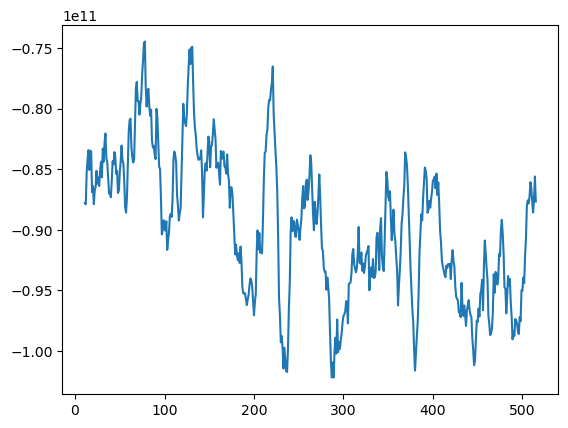

In [21]:
which_strm = np.convolve(all_strms[:, 21, era_fncts.get_lat_idx(-11)], np.ones(12)/12, mode='valid')


plt.plot(range(43*12)[11:], which_strm)

plt.show()


In [19]:
levels

[1,
 2,
 3,
 5,
 7,
 10,
 20,
 30,
 50,
 70,
 100,
 125,
 150,
 175,
 200,
 225,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 775,
 800,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 1000]